<a href="https://colab.research.google.com/github/pranavvyawahare25/Bank-Churn-Classification/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## Reading Data

In [2]:
warnings.filterwarnings('ignore')
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

## Understading the data

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


1. Credit Score Range: The dataset includes a variety of credit scores, indicating a diverse customer base with varying creditworthiness.

2. Geographic Diversity: Customers are from different regions, including France and Spain, suggesting a broad market presence.

3. Gender Distribution: Both male and female customers are represented in the dataset, highlighting gender diversity among customers.

3. Age Range: Customers' ages span across different life stages, indicating a diverse demographic profile.

4. Churn Analysis: The dataset includes information on customer churn, which can be analyzed to understand factors influencing customer attrition and inform retention strategies.







In [4]:
print(df_train.shape)
print(df_test.shape)

(165034, 14)
(110023, 13)


In [5]:
df_train.drop(columns=['id','CustomerId'],inplace=True)
df_test.drop(columns=['id','CustomerId'],inplace=True)

1. Irrelevance: These columns serve as unique identifiers for each data point or customer and do not provide any meaningful information for predictive modeling.

2. Preventing Overfitting: Including irrelevant columns in the modeling process can lead to overfitting, where the model learns noise or patterns specific to the training data but does not generalize well to new data. Removing these columns helps mitigate this risk.

3. Dimensionality Reduction: By dropping unnecessary columns, we reduce the dimensionality of the dataset, making it more manageable for analysis and modeling. This can improve computational efficiency and simplify the modeling process.

In [6]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000




1. Credit Score Distribution:

- The average credit score in the dataset is approximately 656, with
a minimum of 350 and a maximum of 850.
- Understanding the distribution of credit scores is crucial for assessing the overall creditworthiness of the customers.

2. Age Profile:

- The average age of customers is around 38, with a minimum age of 18 and a maximum age of 92.
- Analyzing the age distribution can help in tailoring financial products and services to different age groups.

3. Tenure Information:

- The average tenure of customers with the bank is approximately 5 years, ranging from 0 to 10 years.
- Examining tenure patterns can provide insights into customer loyalty and retention.

4. Balance and Products:

- The average account balance is approximately $55,478, with a wide range from 0 to $250,898.
- Customers hold an average of 1.55 products, with a maximum of 4.
- Understanding the distribution of product holdings and account balances is vital for designing personalized services.

5. Credit Card and Active Membership:

- Around 75% of customers have a credit card, and approximately half are active members.
- Analyzing the proportion of credit card holders and active members can inform strategies to boost participation in these programs.

6. Estimated Salary Distribution:

- The average estimated salary is approximately $112,575.
- Examining the distribution of estimated salaries helps in understanding the income profile of the customer base.

7. Churn Rate:

- The average churn rate is 21.16%, indicating the proportion of customers who exited.
- Understanding the factors influencing customer churn is crucial for implementing retention strategies.

8. Statistical Measures:

- The standard deviations and quartiles provide insights into the variability and spread of each variable.
- Analyzing these measures helps assess the level of diversity in the dataset.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          165034 non-null  object 
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 15.1+ MB


In [8]:
df_train.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df_test.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# There are no null values

In [10]:
df_train['Surname'].unique()

array(['Okwudilichukwu', 'Okwudiliolisa', 'Hsueh', ..., 'Aliyev',
       'McMinn', 'Elkins'], dtype=object)

In [11]:
df_train['Surname'].value_counts()

Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: Surname, Length: 2797, dtype: int64

In [12]:
df_train.drop(columns='Surname',inplace=True)
df_test.drop(columns='Surname',inplace=True)

In [13]:
#Intialize numerical and categorical columns
num_col=[]
cat_col=[]
for col in df_train.drop(columns='Exited').columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else :
        num_col.append(col)
print(num_col)
print(cat_col)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
['Geography', 'Gender']


##Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

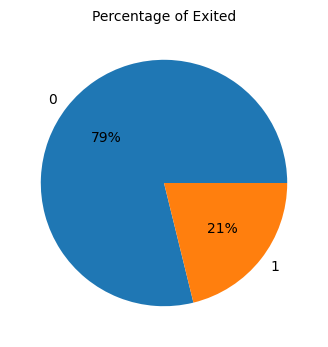

In [14]:
plt.figure(figsize=(6,4))
df_train['Exited'].value_counts().plot(kind='pie',autopct='%0.0f%%')
plt.title('Percentage of Exited',fontsize=10)
plt.ylabel('')
plt.show

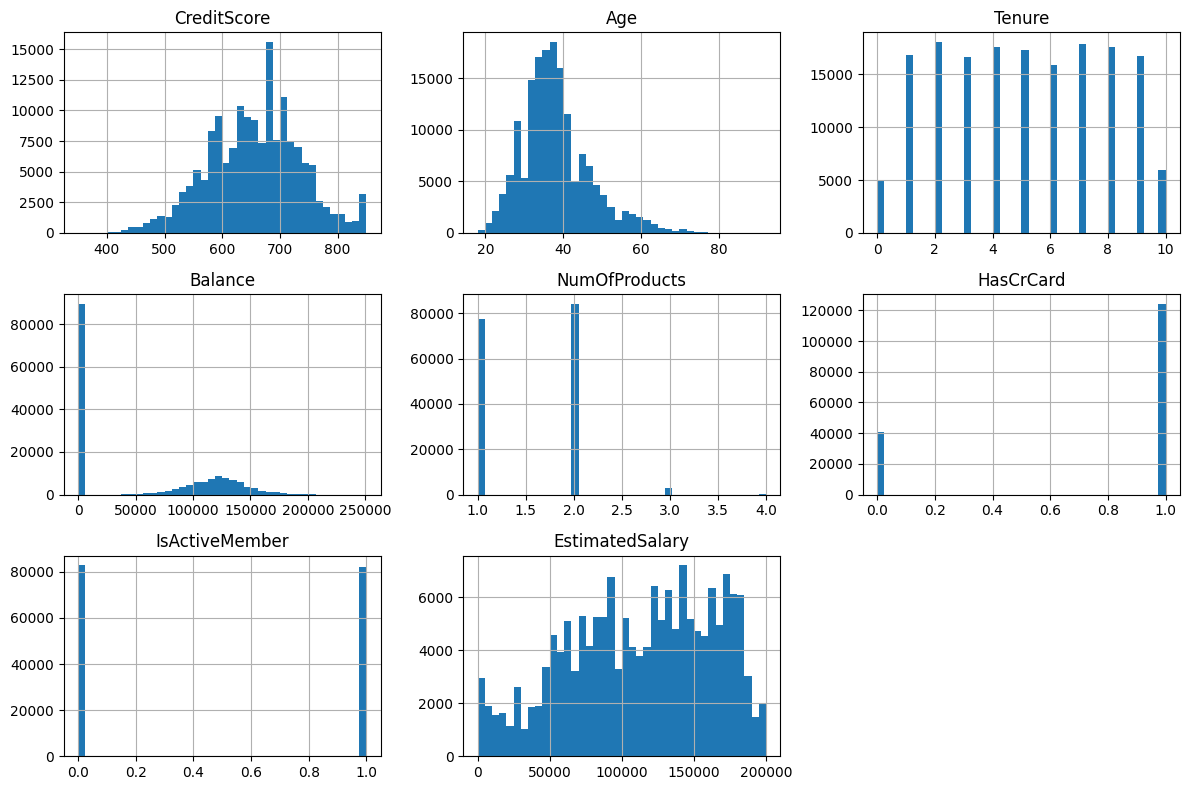

In [15]:
df_train[num_col].hist(bins=40,figsize=(12,8))
plt.tight_layout()
plt.show()

In [16]:
cont_col=df_train[['CreditScore','Age','Balance','EstimatedSalary']]

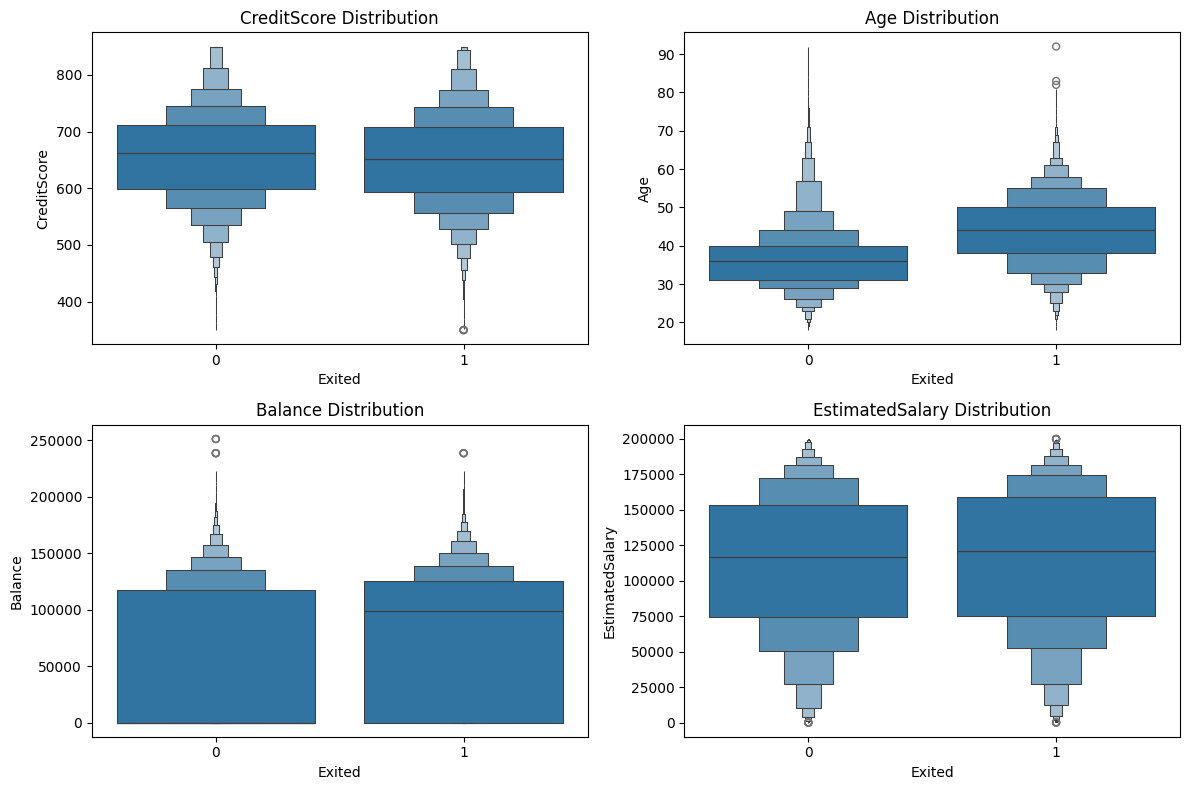

In [17]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.boxenplot(x='Exited',y=column,data=df_train,ax=axes[row_idx,col_idx])
    axes[row_idx,col_idx].set_xlabel('Exited')
    axes[row_idx,col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

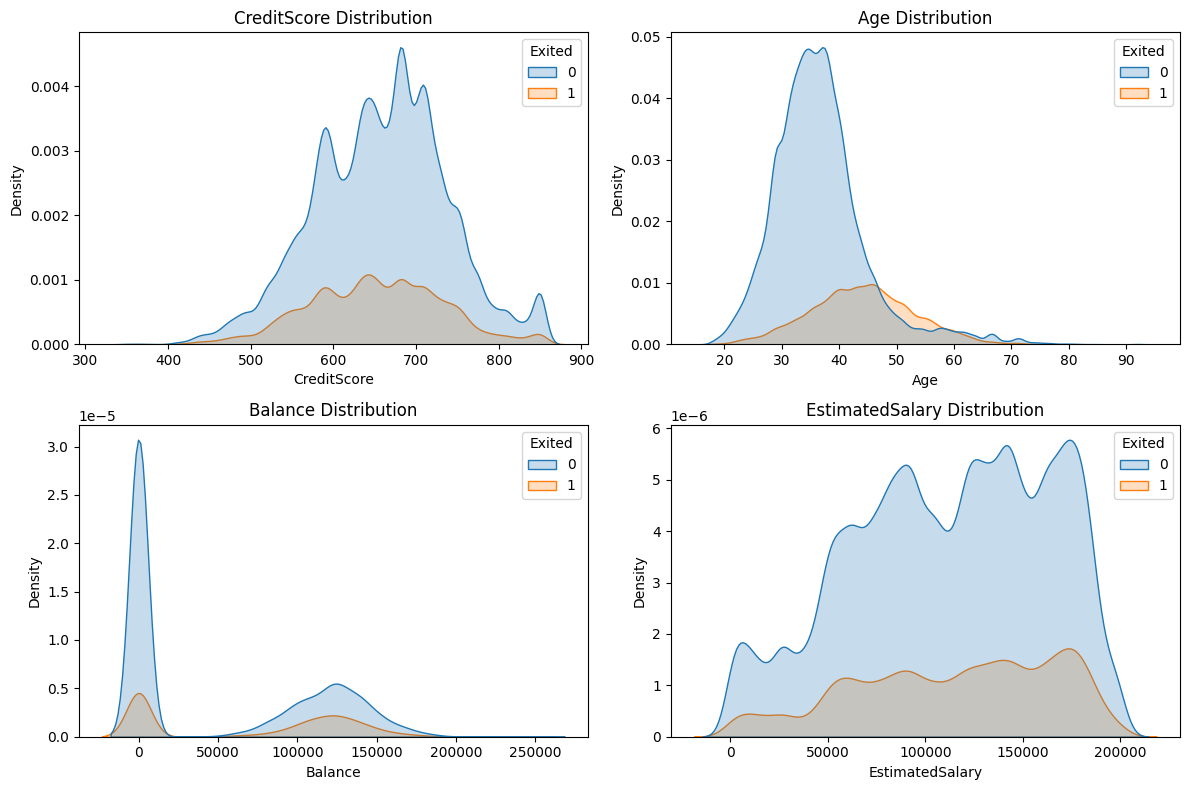

In [18]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.kdeplot(x=column,hue='Exited',data=df_train,ax=axes[row_idx,col_idx],fill=True)
    axes[row_idx,col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()

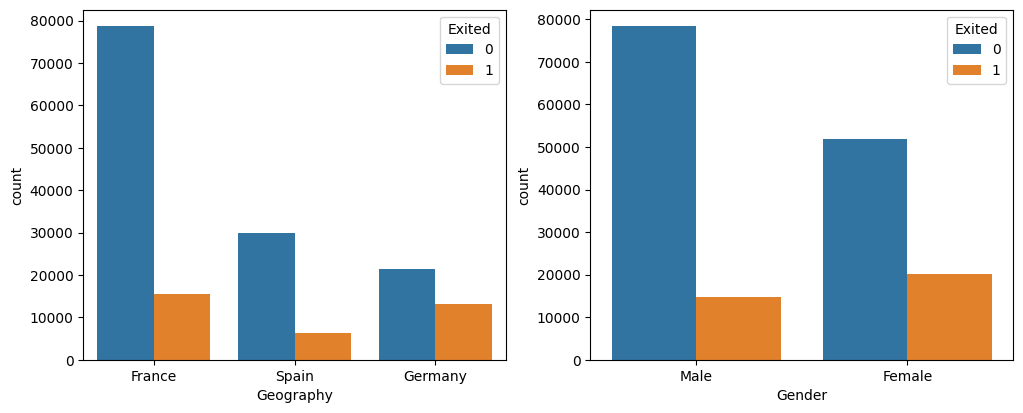

In [19]:
fig = plt.figure(figsize=(12,10))

counter = 0

for i in cat_col:

        sub = fig.add_subplot(2,2,counter+1)
        g = sns.countplot(x=i,data=df_train,hue='Exited')
        plt.xticks()
        counter += 1

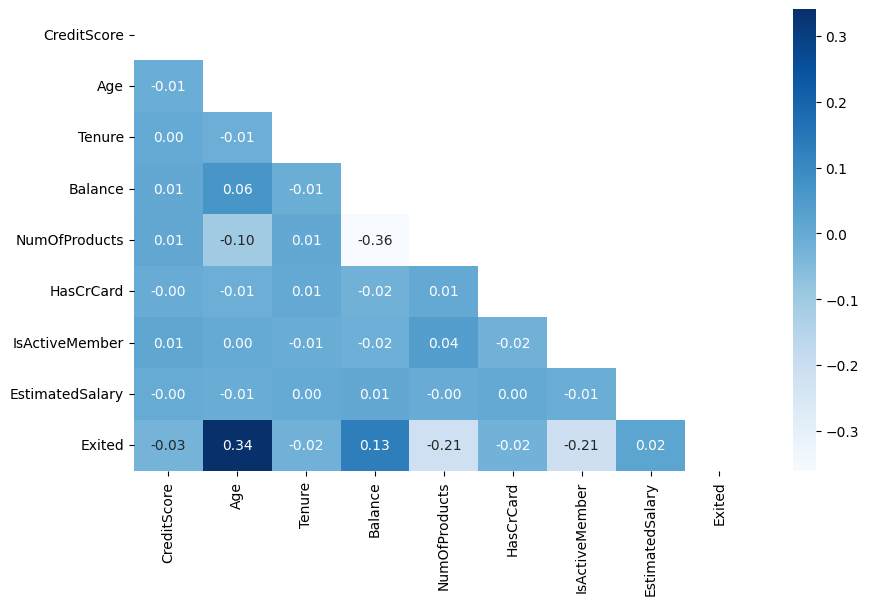

In [20]:
corr = df_train.corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,mask=mask, cmap='Blues', fmt='.2f')
plt.show()

The above is the corelation Matrix and other factors that might influence

# Finding outliers

In [22]:

def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit


def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")

In [23]:
for col in (cont_col.columns):
    outlier_percentage(df_train,col)

CreditScore
Outliers percentage: 0.15330174388307863 %
-------------------------
Age
Outliers percentage: 3.8743531635905324 %
-------------------------
Balance
Outliers percentage: 0.0 %
-------------------------
EstimatedSalary
Outliers percentage: 0.0 %
-------------------------


In [24]:
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit
for column in (cont_col.columns):
    replace_with_threshholds(df_train,df_test,column)

In [26]:
num_attribs=[]
cat_attribs = []
for col in df_train.drop(columns='Exited').columns:
    if df_train[col].dtype=="object" or len(df_train[col].unique())==2 :
        cat_attribs.append(col)
    else:
        num_attribs.append(col)
print(cat_attribs)
print(num_attribs)


['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


The purpose of this code is to categorize columns into numerical and categorical types based on their data types and the number of unique values

### Spliting Data

In [33]:
#Split the labels and the target
X,y=df_train.drop(columns='Exited'),df_train['Exited']

### Importing and building Models

In [34]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,mean_squared_error,roc_auc_score,precision_score,recall_score,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator,TransformerMixin
from xgboost import XGBClassifier

In [35]:
class LogTransform(BaseEstimator,TransformerMixin):
    def __init__(self, columns, domain_shift=1):
        self.columns = columns
        self.domain_shift = domain_shift

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log(X_copy[self.columns] + self.domain_shift)
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)


This transformer is useful for applying a logarithm transformation to specific numerical columns, which can help to make the data more normally distributed and improve the performance of certain machine learning algorithms, especially when the original data is skewed or has a wide range of value

In [36]:
num_pipeline=make_pipeline(LogTransform(['EstimatedSalary','Balance']),StandardScaler())
cat_pipeline=make_pipeline(OrdinalEncoder())
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_attribs),
     ('cat',cat_pipeline,cat_attribs)])

In [37]:

X_1=pd.DataFrame(preprocessing.fit_transform(X,y))
X_1_test=pd.DataFrame(preprocessing.transform(df_test))
X_1

,0,1,2,3,4,5,6,7,8,9
0,0.143908,-0.596933,-0.719973,-0.916696,0.814298,0.814470,0.0,1.0,1.0,0.0
1,-0.368605,-0.596933,-1.432694,-0.916696,0.814298,-0.761767,0.0,1.0,1.0,1.0
2,0.268911,0.258796,1.774548,-0.916696,0.814298,0.837108,0.0,1.0,1.0,0.0
3,-0.943620,-0.474686,-1.076334,1.129121,-1.013348,-0.112037,0.0,1.0,1.0,1.0
4,0.743923,-0.596933,-0.007253,-0.916696,0.814298,-2.205062,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
165029,0.131407,-0.596933,-1.076334,-0.916696,-1.013348,0.426844,2.0,0.0,1.0,1.0
165030,1.693947,-0.352439,-0.719973,-0.916696,-1.013348,0.426842,0.0,1.0,0.0,0.0
165031,-1.143625,-0.841427,-0.007253,-0.916696,-1.013348,0.385603,0.0,1.0,1.0,1.0
165032,-1.281128,-0.963674,0.705467,1.143128,-1.013348,-0.321190,2.0,0.0,0.0,1.0


In [39]:
X_train,X_valid,y_train,y_valid=train_test_split(X_1,y,test_size=0.3,random_state=42)

#Create and train a Random Forest Classfier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
feature_importance=model.feature_importances_

#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})


#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df


,Feature,Importance
1,Geography,0.224696
5,Balance,0.170221
0,CreditScore,0.157934
4,Tenure,0.144429
3,Age,0.114655
2,Gender,0.077637
9,EstimatedSalary,0.046322
6,NumOfProducts,0.031876
7,HasCrCard,0.018159
8,IsActiveMember,0.014070


from matplotlib import pyplot as plt
feature_importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feature_importance_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

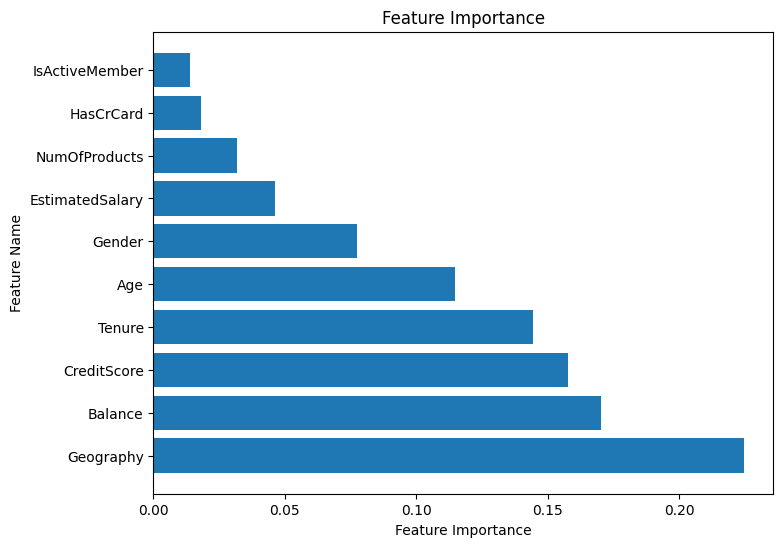

In [40]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

Most influential features in a model, helping in feature selection, understanding model behavior, and providing insights into the underlying data.

In [44]:
def plot_roc_curve(fpr, tpr, label = None):

    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

In [43]:
def plot_confusion_matrix(target_test,target_pred):
    conf=confusion_matrix(target_test,target_pred)
    plot=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not exited', 'Exited'])
    plot.plot()
    plt.show()

In [45]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    #tree models,boosting
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),

    LogisticRegression(random_state=42),
    #xgb,svm

    XGBClassifier(random_state=42),
    #SVC(random_state=42)

]

for model in models:
    model.fit(X_train , y_train)
    prediction = model.predict(X_valid)
    y_predict=model.predict_proba(X_valid)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , y_valid ) * 100 ) )
    roc_auc.append((roc_auc_score(y_valid , y_predict)*100) )
    F1_score.append((f1_score(y_valid , prediction)* 100) )

In [46]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)

#models_df.sort_values("AUC", ascending = False)
models_df


,Model-Name,Accuracy,AUC,F1-Score
0,DecisionTreeClassifier,80.006463,70.431959,53.069739
1,RandomForestClassifier,85.845570,87.133568,61.315964
2,GradientBoostingClassifier,86.481792,88.792851,62.489492
3,ExtraTreesClassifier,85.310335,86.395071,60.263345
4,AdaBoostClassifier,86.075822,87.944320,61.360834
5,LogisticRegression,83.258266,81.294726,48.601724
6,XGBClassifier,86.352528,88.588906,63.255207


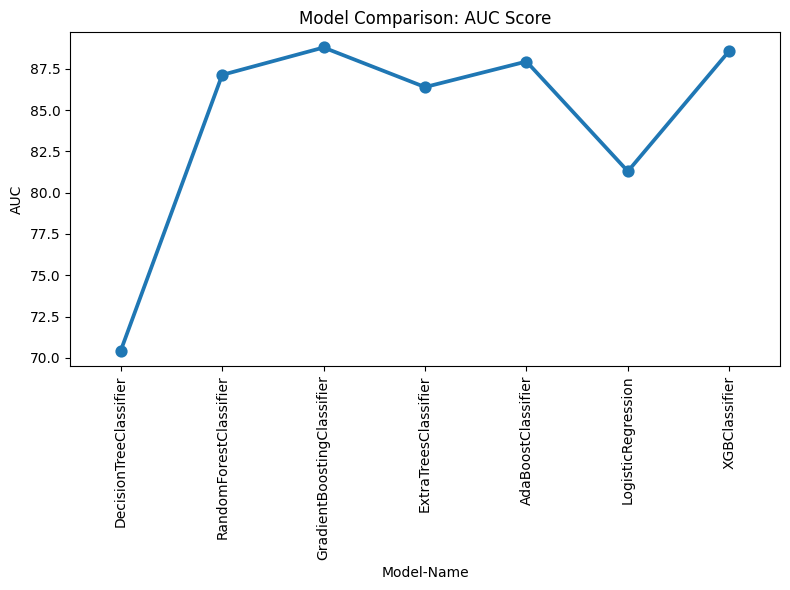

In [47]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='AUC',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()


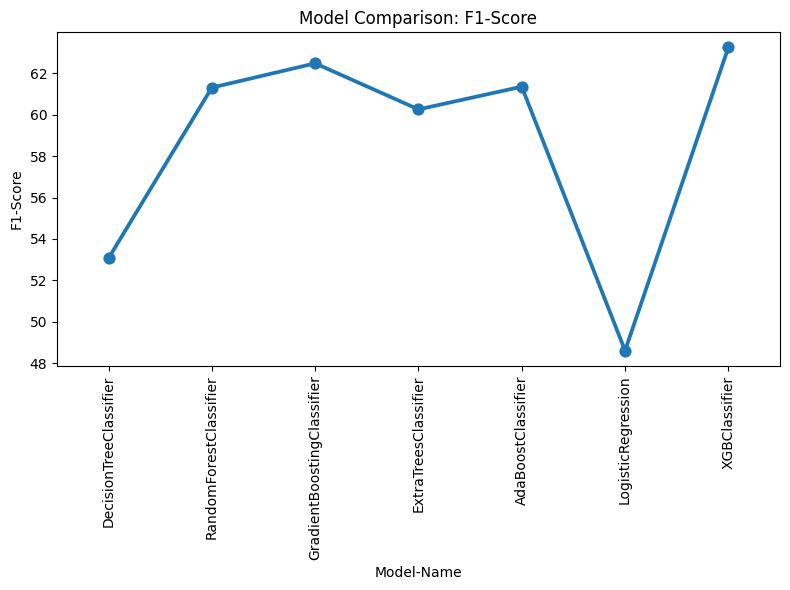

In [48]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='F1-Score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: F1-Score')
plt.tight_layout()
plt.show()


In [49]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_pred_gbc)
print("AUC score:", auc_score)

AUC score: 0.8879285133718128


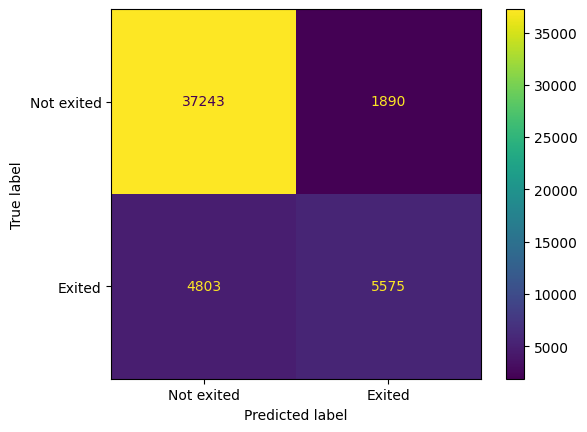

In [50]:
y_pred=gbc.predict(X_valid)
plot_confusion_matrix(y_valid,y_pred)

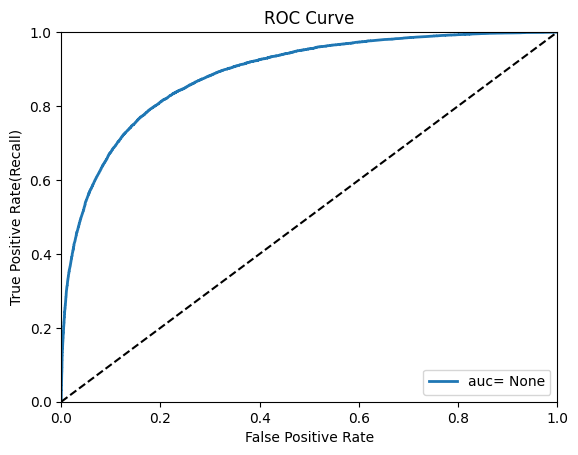

In [51]:
fpr,tpr,thresholds=roc_curve(y_valid,y_pred_gbc)
# Plot ROC curve
plot_roc_curve(fpr,tpr)

In [52]:
X_sub = X_1_test
id=X_1_test.index
y_sub=gbc.predict_proba(X_sub)
y_sub=y_sub[:,1]
id_data=pd.DataFrame(id)
id_data.columns.name='id'
ids=id_data.values
sub = np.concatenate((ids.reshape(-1,1), y_sub.reshape(-1,1)), axis=1)
df_sub = pd.DataFrame(sub, columns=['id', 'Exited'])
df_sub.head()

,id,Exited
0,0.0,0.023112
1,1.0,0.838674
2,2.0,0.035082
3,3.0,0.241707
4,4.0,0.300824


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Exited'].plot(kind='hist', bins=20, title='Exited')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='id', y='Exited', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Exited']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Exited')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Exited'].plot(kind='line', figsize=(8, 4), title='Exited')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
df_sub.to_csv('submission.csv', index=False)